In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

# Görselleştirme ayarları
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Veriyi oku (Dosya yolunu kendi yapına göre güncelle)
# Eğer Colab kullanıyorsan drive mount işlemi gerekebilir.
df = pd.read_csv('/kaggle/input/data-entry-2017/Data_Entry_2017.csv')

# İlk 5 satıra göz atalım
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.3+ MB


In [2]:
# 1. Her satırdaki etiketleri '|' işaretine göre böl (listeye çevirir)
# Örn: "Hernia|Mass" -> ["Hernia", "Mass"]
df['Finding Labels List'] = df['Finding Labels'].str.split('|')

# 2. Tüm etiketleri tek bir havuza topla (Flattening)
all_labels = list(chain.from_iterable(df['Finding Labels List'].values))

# 3. Her hastalıktan kaç tane olduğunu say
label_counts = pd.Series(all_labels).value_counts()

print("Total Number of Cases:")
print(label_counts)

Total Number of Cases:
No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: count, dtype: int64


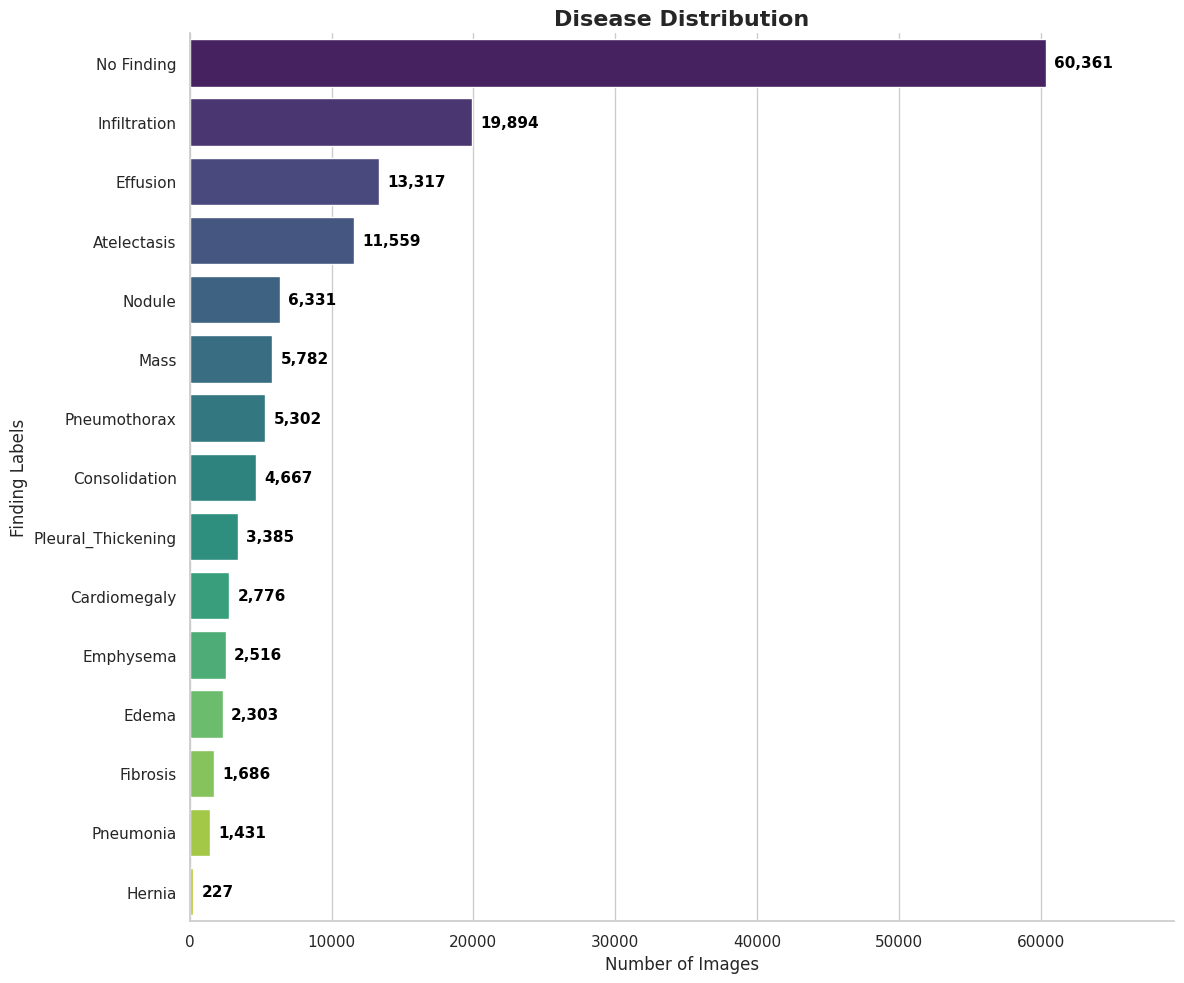

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# 1. Veri Hazırlığı (Aynı adımlar)
# df = pd.read_csv('../01_Sample_Data/Data_Entry_2017.csv') 
all_labels = df['Finding Labels'].str.split('|').explode()
label_counts = all_labels.value_counts()

# 2. Grafik Ayarları
plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")

# Bar Plot
ax = sns.barplot(x=label_counts.values, y=label_counts.index, palette="viridis")

plt.title('Disease Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Number of Images', fontsize=12)

# --- DÜZELTME: SADECE SAYILAR ---
# Yine dinamik boşluk bırakıyoruz ki yazı çubuğa yapışmasın
offset = label_counts.values.max() * 0.01

for i, v in enumerate(label_counts.values):
    # Yüzde hesabını kaldırdık.
    # Sadece sayıyı (binlik ayracı ile) yazdırıyoruz.
    text_label = f"{v:,}" 
    
    # Konumlandırma aynı mantıkla devam ediyor
    ax.text(x=v + offset, y=i, s=text_label, color='black', 
            va='center', ha='left', fontsize=11, fontweight='bold')

# Sağ taraftaki boşluğu koruyalım
plt.xlim(0, label_counts.values.max() * 1.15)

sns.despine()
plt.tight_layout()
plt.show()